<a href="https://colab.research.google.com/github/jrctechmind/data-science-portfolio/blob/main/Desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando os dados...
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.8s
Dados carregados com sucesso!

Descrição estatística dos dados:
                Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303


Executando Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303


Random Forest:
              precision    recall  f1-score   support

          No       0.85      1.00      0.92      5900
         Yes       0.97      0.25      0.40      1403

    accuracy                           0.86      7303
   macro avg       0.91      0.63      0.66      7303
weighted avg       0.87      0.86      0.82      7303



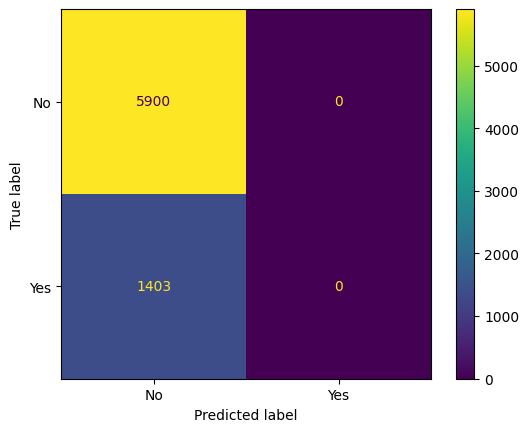

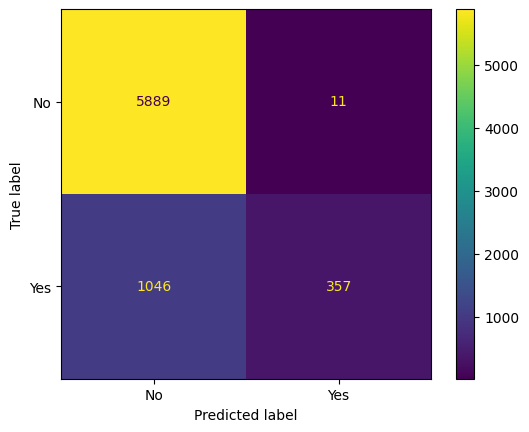

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from joblib import parallel_backend

# Caminho do arquivo
file_path = "/content/sample_data/streaming_data.csv"

# Carregando os dados
print("Carregando os dados...")
try:
    df = pd.read_csv(file_path)
    print("Dados carregados com sucesso!")

    # Descrição estatística dos dados após o carregamento
    print("\nDescrição estatística dos dados:")
    print(df.describe())
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho e tente novamente.")

# Substituir valores NaN por 0
cols_to_replace_nan = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[cols_to_replace_nan] = df[cols_to_replace_nan].fillna(0)

# Dropar linhas nulas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

# Transformar valores churned 0 e 1 por No e Yes
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

# Transformar valores floats em inteiros
df['Avg_rating'] = df['Avg_rating'].astype(int)

# Definir variáveis X e y
X = df.drop('Churned', axis=1)
y = df['Churned']

# Codificar variáveis categóricas
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de Regressão Logística
print("\nExecutando Regressão Logística...")
log_reg_model = LogisticRegression(max_iter=1000)

# Paralelização para GridSearchCV
with parallel_backend('threading'):
    # Definindo parâmetros para GridSearchCV
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }

    # Criando objeto GridSearchCV
    grid_search_log_reg = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Ajustando o modelo
    grid_search_log_reg.fit(X_train, y_train)

# Obtendo as melhores métricas
best_log_reg_model = grid_search_log_reg.best_estimator_

# Realizando as previsões
y_pred_log_reg = best_log_reg_model.predict(X_test)

# Exibindo as métricas
print("\nMétricas Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))

# Exibindo a matriz de confusão
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=best_log_reg_model.classes_)
disp_log_reg.plot()

# Modelo Random Forest
print("\nExecutando Random Forest...")

# Paralelização para GridSearchCV
with parallel_backend('threading'):
    # Definindo parâmetros para GridSearchCV
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Criando objeto GridSearchCV
    grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Ajustando o modelo
    grid_search_rf.fit(X_train, y_train)

# Obtendo as melhores métricas
best_rf_model = grid_search_rf.best_estimator_

# Realizando as previsões
y_pred_rf = best_rf_model.predict(X_test)

# Exibindo as métricas
print("\nMétricas Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Exibindo a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot()

# Comparação entre os modelos
print("\nComparação entre Regressão Logística e Random Forest:")
print("Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))